# **Data Modelling and Evaluating**
---

## Objectives

* Answer business requirement 2: 
    * The client wants the system to identify which animal species is present in an image.


## Inputs

* inputs/datasets/animals/image/train/
* inputs/datasets/animals/image/test/
* inputs/datasets/animals/image/validation/
* Image shape embeddings: outputs/v1/image_shape.pkl

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation pipeline.
* Class indices mapping.
* Machine learning model creation and training.
* Saved trained model.
* Learning curve plots for model performance.
* Model evaluation stored in pickle file.
* Prediction on a random image file.


## Additional Comments | Insights | Conclusions

* N/A for now

---

## Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import joblib
sns.set_style("white")

## Set Working Directory

In [2]:
cwd = os.getcwd()
os.chdir('/workspaces/Animal_detection_camera')
print("You set a new current directory")

work_dir = os.getcwd()
work_dir

You set a new current directory


'/workspaces/Animal_detection_camera'

## Set input directories
Set train, validation and test paths

In [7]:
my_data_dir = 'inputs/datasets/animals/image'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'


## Set output directory

In [8]:
version = 'v1'
file_path = f'outputs/{version}'
os.makedirs(file_path, exist_ok=True)

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available, create a new version.')
else:
    os.makedirs(name=file_path, exist_ok=True)

Old version is already available, create a new version.


## Set labels

In [10]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['lemur', 'snake', 'elephant', 'frog', 'chimpanzee', 'chinchilla', 'flamingo', 'mongoose', 'ostrich', 'ferret', 'camel', 'bee', 'mole', 'penguin', 'leopard', 'hawk', 'hedgehog', 'walrus', 'falcon', 'grasshopper', 'beaver', 'antelope', 'giraffe', 'duck', 'lizard', 'crab', 'goose', 'gorilla', 'jaguar', 'sheep', 'lynx', 'butterfly', 'panda', 'goat', 'deer', 'peacock', 'dog', 'whale', 'kangaroo', 'seal', 'cheetah', 'cow', 'iguana', 'hippopotamus', 'fox', 'cat', 'donkey', 'raccoon', 'blackbird', 'buffalo', 'koala', 'crocodile', 'dolphin', 'hyena', 'porcupine', 'bear', 'squid', 'spider', 'eagle', 'bison', 'owl', 'otter', 'snail', 'wolf']


## Set Image Shape

In [ ]:
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape = (128, 128, 3)
print("Using image shape:", image_shape)

Using image shape: (128, 128, 3)


---

# Number of images in train, test and validation data
---

* train - lemur: 151 images
* train - snake: 151 images
* train - elephant: 201 images
* train - frog: 218 images
* train - chimpanzee: 151 images
* train - chinchilla: 151 images
* train - flamingo: 151 images
* train - mongoose: 151 images
* train - ostrich: 151 images
* train - ferret: 151 images
* train - camel: 151 images
* train - bee: 151 images
* train - mole: 123 images
* train - penguin: 151 images
* train - leopard: 151 images
* train - hawk: 151 images
* train - hedgehog: 151 images
* train - walrus: 151 images
* train - falcon: 151 images
* train - grasshopper: 151 images
* train - beaver: 151 images
* train - antelope: 151 images
* train - giraffe: 151 images
* train - duck: 151 images
* train - lizard: 151 images
* train - crab: 151 images
* train - goose: 151 images
* train - gorilla: 151 images
* train - jaguar: 130 images
* train - sheep: 151 images
* train - lynx: 151 images
* train - butterfly: 151 images
* train - panda: 151 images
* train - goat: 151 images
* trai

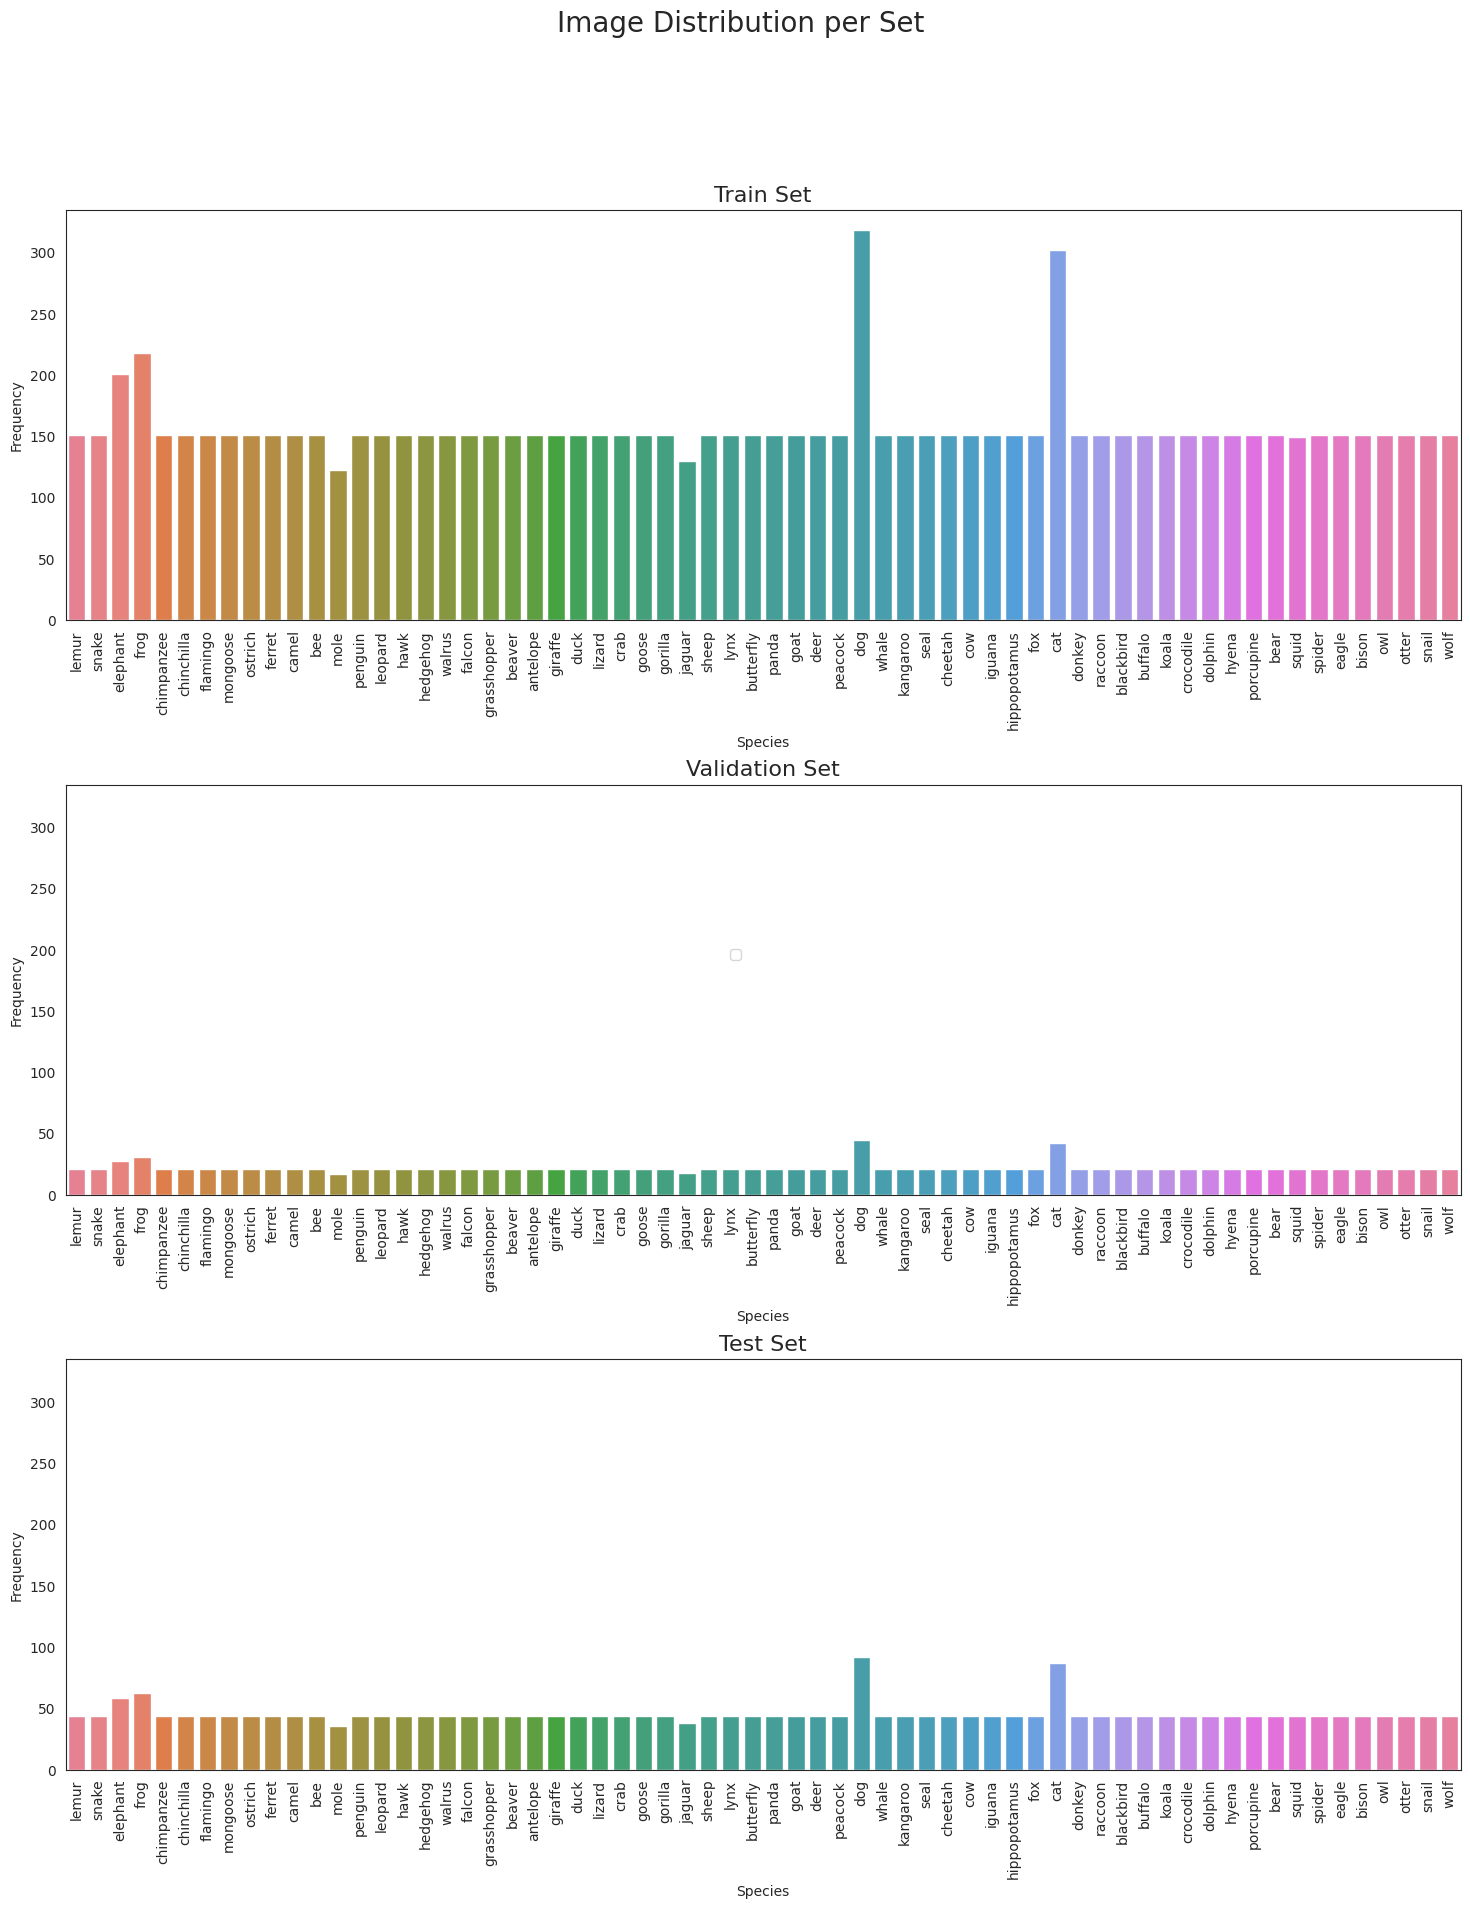

In [21]:
data = {'Set': [], 'Label': [], 'Frequency': []}
folders = ['train', 'validation', 'test']

for folder in folders:
    for label in labels:
        n = len(os.listdir(my_data_dir + '/' + folder + '/' + label))
        data['Set'].append(folder)
        data['Label'].append(label)
        data['Frequency'].append(n)
        print(f"* {folder} - {label}: {n} images")

df_freq = pd.DataFrame(data)

fig, axes = plt.subplots(3, 1, figsize=(18, 20), sharey=True)

sets = ['train', 'validation', 'test']

for i, subset in enumerate(sets):
    sns.barplot(
        data=df_freq[df_freq['Set'] == subset],
        x='Label', y='Frequency', hue='Label', dodge=False, ax=axes[i]
    )
    axes[i].set_title(f"{subset.capitalize()} Set", fontsize=16)
    axes[i].set_xlabel("Species")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x', rotation=90)

handles, labels_legend = axes[0].get_legend_handles_labels()
fig.legend(handles, labels_legend, loc='center', ncol=6, fontsize=10)

plt.subplots_adjust(hspace=0.4, bottom=0.1)

fig.suptitle("Image Distribution per Set", fontsize=20)
plt.savefig(f'{file_path}/labels_distribution_rows.png', dpi=150, bbox_inches='tight')
plt.show()


---

# Image data augmentation
---

### ImageDataGenerator

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-09-19 14:47:58.272587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Initialize ImageDataGenerator and set batch size

In [23]:
batch_size = 8
augmented_image_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

Augment training image dataset

In [26]:
train_set = augmented_image_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 10050 images belonging to 64 classes.


Augment validation image dataset

In [27]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1400 images belonging to 64 classes.


Augment test image dataset

In [28]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2927 images belonging to 64 classes.


Save class indices

In [29]:
joblib.dump(value=train_set.class_indices,
    filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

## Preview Augmented Images

Plot augmented training images

(8, 128, 128, 3)


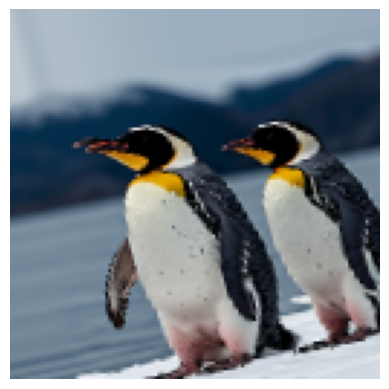

(8, 128, 128, 3)


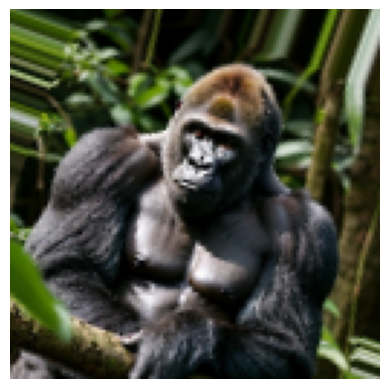

(8, 128, 128, 3)


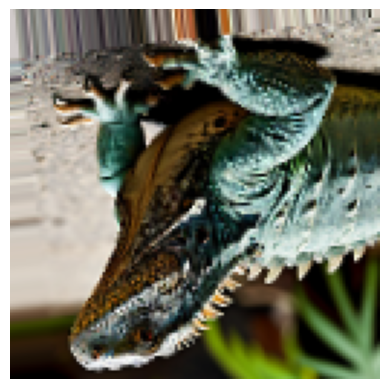

In [30]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.axis("off")
    plt.show()